# Đồ án cuối kỳ

Họ tên: Hoàng Anh Kiệt

MSSV: 1712542

___

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

___

## Lấy dữ liệu

Dữ liệu được dùng trong đồ án này là `'hotel_bookings.csv'`. Đây là dữ liệu về thông tin đặt phòng khách sạn của City Hotel (1 khách sạn nằm ở thành phố Lisbon, Bồ Đào Nha) và Resort Hotel (1 khách sạn ở khu nghỉ dưỡng Algarve, Bồ Đào Nha) trong giai đoạn từ ngày 01/07/2015 đến ngày 31/08/2017; dữ liệu ghi nhận tất cả lượt đặt phòng bao gồm cả thực sự nhận phòng và hủy đặt phòng.

Dữ liệu này được lấy từ tập dữ liệu [Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand) trên Kaggle.
* License: [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)
* Dữ liệu gốc được lấy từ bài báo [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), được tải và 'làm sạch' bởi Thomas Mock và Antoine Bichat.

Dữ liệu gốc được thu thập bằng cách trích xuất từ cơ sở dữ liệu của khách sạn (hotels’ Property Management System (PMS) SQL databases)

___

## Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [2]:
booking_df = pd.read_csv('hotel_bookings.csv')
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dữ liệu có bao nhiêu dòng và cột?

In [3]:
num_rows, num_cols = booking_df.shape
print('num_rows:', num_rows)
print('num_cols', num_cols)

num_rows: 119390
num_cols 32


Dữ liệu có 119390 dòng và 32 cột.

### Mỗi dòng có ý nghĩa gì?

Mỗi dòng ứng với thông tin của một lượt đặt phòng khách sạn.

### Mỗi cột có ý nghĩa gì?

* **hotel**: cho biết đặt phòng ở khách sạn nào? *(Resort Hotel hay City Hotel?)*
* **is_canceled**: cho biết lượt đặt phòng này có bị hủy hay không? *(1 nếu bị hủy, 2 nếu không hủy)*
* **lead_time**: cho biết số ngày tình từ ngày đặt phòng (được nhập vào PMS SQL databases) đến ngày đến nhận phòng.
* **arrival_date_year**: cho biết năm của ngày đến nhận phòng.
* **arrival_date_month**: cho biết tháng của ngày đến nhận phòng.
* **arrival_date_week_number**: cho biết tuần ngày đến nhận phòng.
* **arrival_date_day_of_month**: cho biết ngày trong tháng của ngày đến nhận phòng (day).
* **stays_in_weekend_nights**: cho biết số đêm cuối tuần (Thứ Bảy, Chủ Nhật) mà khách ở hoặc đặt phòng tại khách sạn.
* **stays_in_week_nights**: cho biết số đêm trong tuần (từ Thứ Hai đến Thứ Sáu) mà khách ở hoặc đặt phòng tại khách sạn.
* **adults**: cho biết số lượng người lớn của lượt đặt phòng này.
* **children**: cho biết số lượng trẻ em của lượt đặt phòng này.
* **babies**: cho biết số lượng trẻ sơ sinh của lượt đặt phòng này.
* **meal**: cho biết loại bữa ăn đã đặt. *(Undefined/SC: không gói bữa ăn; BB: Bed & Breakfast; HB: Haft board (bữa sáng và 1 bữa ăn khác - thường là bữa tối); FB: Full board (bữa sáng, trưa và tối))*
* **country**: cho biết khách hàng đến từ quốc gia nào. *(Được trình bày ở định dạng ISO 3155-3:2013)*
* **market_segment**: cho biết phân khúc thị trường. *(TA: Đại lý du lịch(Travel Agents); TO: công ty kinh doanh lữ hành(Tour Operators))*
* **distribution_channel**: cho biết kênh phân phối đặt phòng. *(TA: Đại lý du lịch(Travel Agents); TO: công ty kinh doanh lữ hành(Tour Operators))*
* **is_repeated_guest**: cho biết khách hàng đã từng đặt phòng nhiều lần? *(1 nếu khách hàng đã từng đặt phòng ở đây, 0 nếu khách hàng chưa từng đặt phòng ở đây)*
* **previous_cancellations**: cho biết số lượt đặt phòng mà khách hàng đã hủy trước lượt đặt hiện tại.
* **previous_bookings_not_canceled**: cho biết số lượt đặt phòng trước đó mà khách hàng không hủy trước lượt đặt hiện tại.
* **reserved_room_type**: mã của loại phòng đã đặt trước.
* **assigned_room_type**: mã của loại phòng được chỉ định cho đặt phòng. *(Đôi khi vì một số lý do mà loại phòng được chỉ định khác với loại phòng mà khác hàng đã đặt trước, có thể vì lý do yêu cầu hoạt động của khách sạn hoặc do yêu cầu của khách hàng)*
* **booking_changes**: cho biết số lượng thay đổi đối với lượt đặt phòng từ thời điểm đặt phòng được nhập trên PMS cho đến thời điểm nhận phòng hoặc hủy bỏ phòng.
* **deposit_type**: cho biết khách hàng có đặt cọc trước để đảm bảo có phòng ở hay không. *(No Deposit: không đặt cọc; Non Refund: đặt cọc một khoản bằng tổng chi phí lưu trú; Refundable: đặt cọc một khoản nhỏ hơn tổng chi phí lưu trú)*
* **agent**: ID của đại lý du lịch đã thực hiện đặt phòng.
* **company**: ID của công ty/tổ chức đã thực hiện đặt phòng hoặc chịu trách nhiệm thanh toán đặt phòng.
* **days_in_waiting_list**: cho biết số ngày mà lượt đặt phòng phải chờ trước khi được xác nhận cho khách hàng.
* **customer_type**: cho biết loại đặt phòng. *(Contract: khi đặt phòng có giao khoán hoặc các loại hợp đồng khác liên quan đến nó; Group: khi đặt phòng được liên kết với một nhóm; Transient: khi đặt phòng không thuộc nhóm (Group) hoặc hợp đồng (Contract) và không liên quan đến đặt chỗ tạm thời khác; Transient-party: khi đặt phòng chỉ là tạm thời nhưng được liên kết với ít nhất 1 đặt chỗ tạm thời khác)*
* **adr**: (Average Daily Rate) cho biết giá tiền trung bình 1 ngày. *(được tính bằng Tổng chi phí lưu trú chia cho tổng số đêm lưu trú)*
* **required_car_parking_spaces**: cho biết số lượng chỗ để xe mà khách hàng yêu cầu.
* **total_of_special_requests**: cho biết số lượng các yêu câu đặc biệt khác của khách hàng *(như là phải có giường đôi hay phải ở tầng cao,...)*
* **reservation_status**: cho biết trạng thái đặt phòng cuối cùng. *(Canceled: khách đã hủy đặt phòng; Check-Out: khách đã thực hiện trả phòng; No-Show: khách không nhận phòng và đã thông báo lý do cho khách sạn)*
* **reservation_status_date**: cho biết ngày mà trạng thái đặt phòng cuối cùng được thiết lập. *(có thể kết hợp với 'reservation_status' để cho biết khi nào đặt phòng bị hủy hay khi nào khách trả phòng)*

### Kiểu dữ liệu mỗi cột?

In [4]:
booking_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**<font color=red>Vấn đề:</font>**

- Cột 'reservation_status_date' đang có dtype là `object`. Ta sẽ chuyển sang dạng `datetime`.
- Cột 'children' đang có dtype là `float`, ta cần chuyển về dạng `int` *(vì số lượng trẻ em phải là số nguyên)*.
- Kết hợp 3 cột 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' thành 1 cột duy nhất là 'arrival_date' có dtype là `datatime` thì sẽ có nhiều ý nghĩa hơn là để riêng lẻ 3 cột *(sau đó ta sẽ drop 3 cột ban đầu đi)*.

#### Chuyển dtype của cột 'reservation_status_date' sang datetime

In [5]:
booking_df['reservation_status_date'] = pd.to_datetime(booking_df['reservation_status_date'], format="%Y-%m-%d")

#### Chuyển dtype của cột 'children' sang dạng int

Ban đầu, ta sẽ không thể chuyển dtype của cột 'children' sang dạng `int` ngay được vì tồn tại giá trị NaN:

In [6]:
booking_df[booking_df['children'].isna()]['children']

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

Các giá trị NaN này là các ô trống, có thể là các lượt đặt phòng này không có trẻ em đi cùng. Do đó sẽ khá hợp lý khi ta điền vào những ô trống này giá trị 0.

In [7]:
# Điền vào ô trống giá trị 0
booking_df['children'].fillna(0, inplace=True)

Bây giờ ta có thể chuyển dtype của cột 'children' sang dạng `int`:

In [8]:
booking_df['children'] = booking_df['children'].astype('int')

#### Gom 3 cột  'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' thành 1 cột 'arrival_date' có dtype là datetime

Gom 3 cột 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' lại thành 1 cột 'arrival_date'. 
* **arrival_date**: thể hiện ngày tháng năm của ngày đến nhận phòng.

In [9]:
booking_df['arrival_date'] = pd.to_datetime(booking_df['arrival_date_year'].astype(str) + '-' 
                                            +  booking_df['arrival_date_month'].astype(str) + '-' 
                                            + booking_df['arrival_date_day_of_month'].astype(str), format="%Y-%B-%d")

Drop 3 cột 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' vì ta đã có cột 'arrival_date' rồi

In [10]:
booking_df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

Sau khi xử lý kiểu dữ liệu của các cột là *(hiện tại ta có 30 cột)*:

In [11]:
booking_df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int32
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent               

### Miền giá trị của các cột dạng Numeric và Datetime

In [12]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_week_number          119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int32
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non

Trong 30 cột, ta có 20 cột có kiểu `numeric` hoặc `datetime` là: "is_canceled", "lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "agent", "company", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests", "reservation_status_date", "arrival_date".

Trong đó có 2 cột "is_canceled", "is_repeated_guest" thật ra là dạng binary (chỉ có 2 giá trị 0 và 1); 2 cột "agent", "company" thật ra là dạng categorical (vì được đánh mã dưới dạng số). Do đó ta cần thể hiện miền giá trị của 16 cột còn lại.

In [13]:
# Danh sách các tên cột mà dtypes khác 'object'
numeric_cols_name = set(booking_df.dtypes[booking_df.dtypes != 'object'].index)
# Bỏ 4 cột "is_canceled", "is_repeated_guest", "agent", "company"
numeric_cols_name -= {"is_canceled", "is_repeated_guest", "agent", "company"}

Miền giá trị của các biến numeric hoặc datetime:

In [14]:
pd.DataFrame({'min': booking_df[numeric_cols_name].min(),
              'max': booking_df[numeric_cols_name].max()})

,min,max
stays_in_week_nights,0,50
adr,-6.38,5400
stays_in_weekend_nights,0,19
required_car_parking_spaces,0,8
adults,0,55
babies,0,10
previous_bookings_not_canceled,0,72
arrival_date,2015-07-01 00:00:00,2017-08-31 00:00:00
booking_changes,0,21
days_in_waiting_list,0,391


### Các giá trị có thể có của các cột dạng categorical?

In [15]:
# Danh sách các tên cột dạng categorical
# Lấy danh sách các tất cả các cột bỏ đi các cột dạng numeric hoặc datetime và các cột dạng binary
cat_cols_name = set(booking_df.columns) - numeric_cols_name - {"is_canceled", "is_repeated_guest"}

Danh sách các giá trị có thể có của các cột dạng categorical (Nếu quá nhiều giá trị thì sẽ bị thể hiện bởi dấu ba chấm):

In [16]:
# Số lượng giá trị unique
num_unique_val = booking_df[cat_cols_name].nunique()
# List các giá trị unique đã được sắp tăng dần theo thứ tự
unique_val = booking_df[cat_cols_name].apply(lambda s: list(s.sort_values().unique()))

In [17]:
pd.DataFrame({'NumUniqueVals': num_unique_val, 'UniqueVals': unique_val})

,NumUniqueVals,UniqueVals
assigned_room_type,12,"[A, B, C, D, E, F, G, H, I, K, L, P]"
customer_type,4,"[Contract, Group, Transient, Transient-Party]"
agent,333,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
reserved_room_type,10,"[A, B, C, D, E, F, G, H, L, P]"
meal,5,"[BB, FB, HB, SC, Undefined]"
reservation_status,3,"[Canceled, Check-Out, No-Show]"
country,177,"[ABW, AGO, AIA, ALB, AND, ARE, ARG, ARM, ASM, ..."
company,352,"[6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 16.0, ..."
hotel,2,"[City Hotel, Resort Hotel]"
market_segment,8,"[Aviation, Complementary, Corporate, Direct, G..."


### Các giá trị bị thiếu?

Số lượng các giá trị bị thiếu mỗi cột:

In [18]:
booking_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

Có 3 cột có giá trị bị thiếu là "country", "agent" và "company". Đối với cột "country" giá trị bị thiếu có thể là do không xác định được khách hàng đến từ quốc gia nào. Đối với cột "agent" và "company", các giá trị bị thiếu có thể do đây là các lượt đặt phòng cá nhân, không thông qua bất kỳ đại lý hay công ty nào.

### Các giá trị bất thường?

#### Cột "adr"

Như đã biết cột "adr" cho biết giá tiền trung bình 1 ngày (được tính bằng Tổng chi phí lưu trú chia cho tổng số đêm lưu trú).
Tuy nhiên lại xuất hiện giá trị âm:

In [19]:
booking_df[booking_df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
14969,Resort Hotel,0,195,10,4,6,2,0,0,BB,...,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05


Đây có thể là lỗi do nhập liệu.

____

## Đưa ra các câu hỏi cần trả lời

Sau quá trình khám phá dữ liệu, ta có một số câu hỏi có thể trả lời bằng dữ liệu:
1. Với mỗi Hotel *(City Hotel và Resort Hotel)* giá tiền trung bình 1 ngày *(trung bình 'adr')* thay đổi như thế nào theo tháng đến nhận phòng *('arrival_date')*?
    * Trả lời được câu hỏi này mình có thể biết được giá tiền trung bình 1 ngày thay đổi như thế nào theo từng tháng với mỗi Hotel.
    * Có thể biết được với mỗi tháng giá tiền trung bình 1 ngày của Hotel nào rẻ hơn hay mắc hơn.
    * Từ đó đối với người khách hàng có thể lựa chọn thời điểm  thích hợp *(nên đặt để nhận phòng vào tháng nào?)* và lựa chọn Hotel nào đặt phòng để có chi phí hợp lý nhất theo nhu cầu.
2. 

Thời gian đợi lead_time có ảnh hưởng đến việc hủy phòng?
Tỷ lệ hủy phòng thay đổi như thế nào theo tháng?
Số lượng đặt phòng tháng nào nhiều nhất?
Xu hướng đặt phòng (số lượng đặt phòng) theo từng năm?
Giá phòng tháng nào rẻ nhất để book đi du lịch?
Ở bao nhiêu ngày thì giá tiền trung bình mỗi ngày rẻ nhât?
Khách hàng private hay đi theo nhóm hoặc công ty mang lại doanh thu cao hơn?

____

## Phân tích dữ liệu để trả lời cho các câu hỏi 

### Với mỗi Hotel (City Hotel và Resort Hotel) giá tiền trung bình 1 ngày (trung bình 'adr') thay đổi như thế nào theo tháng của ngày đến nhận phòng ('arrival_date')?

#### Tiền xử lý

Thêm cột 'arrival_date_month' vào DataFrame do mình cần thông tin tháng của ngày nhận phòng. *(Mặc dù trước đây mình đã drop cột này 😄)*

In [20]:
booking_df = booking_df.assign(arrival_date_month = booking_df['arrival_date'].dt.month)

Để trả lời cho câu hỏi này, ta sẽ thực hiện các bước sau:
- Bước 1: Tính DataFrame adr_each_month_df gồm 2 cột *('City Hotel' và 'Resort Hotel')* ứng với giá tiền trung bình 1 ngày của mỗi Hotel và 12 dòng *(1, 2, ..., 12)* ứng với 12 tháng.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line để thể hiện xu hướng thay đổi của giá tiền trung bình 1 ngày của mỗi Hotel

Tính DataFrame adr_each_month_df bằng cách gom nhóm theo 'hotel' và 'arrival_date_month', sau đó tính trung bình 'adr'. Lúc này ta có MultiIndex Series, kế tiếp cần unstack để có được DataFrame theo mong muốn

In [21]:
adr_each_month_df = booking_df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().unstack(0)
adr_each_month_df

hotel,City Hotel,Resort Hotel
arrival_date_month,,
1,82.628986,49.461883
2,85.088278,55.171930
3,92.643116,57.520147
4,111.251838,77.849496
5,121.638560,78.758134
6,119.074341,110.444749
7,110.734292,155.181299
8,114.680455,186.790574
9,110.004661,93.252030


Vẽ đồ thị dạng line:

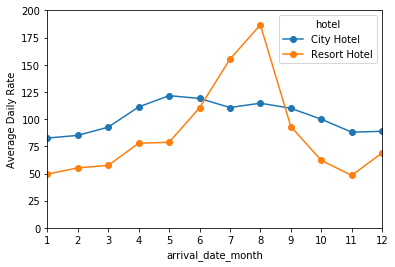

In [22]:
adr_each_month_df.plot(marker='o')
plt.ylim((0, 200))
plt.xticks(np.arange(1, 13))
plt.ylabel('Average Daily Rate');

* Đối với City Hotel giá tiền trung bình 1 ngày giữa các tháng không chênh lệch nhiều, từ tháng 4 đến tháng 9 giá tiền trung bình 1 ngày cao hơn các tháng còn lại.
* Đối với Resort Hotel giá tiền trung bình 1 ngày giữa các tháng có sự chênh lệch lớn, tháng 8 là tháng có giá cao nhất. Từ tháng 6 đến tháng 9 có giá trung bình cao hơn các tháng còn lại, có lẽ đây là dịp hè mọi người đi du lịch nghỉ dưỡng nhiều nên giá trung bình mỗi ngày cao hơn.
* Do đó để tiết kiệm tiền, khách hàng nên đặt chỗ ở vào khoảng tháng 11, 12, 1, 2, 3 thì sẽ có giá rẻ hơn.
* Nhìn trung giá trung bình mỗi ngày ở City Hotel cao hơn Resort Hotel; tuy nhiên vào tháng 7 và 8, Resort Hotel lại có giá cao hơn. 

___

## Nhìn lại quá trình làm đồ án

___

## Tài liệu tham khảo